[1.00000000e+00 1.99090377e-10]
[9.40187609e+07 1.32659898e+03]


/tmp/ipykernel_8901/635320601.py:27: UserWarning: 
The palette list has fewer values (10) than needed (442) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 454 samples in 0.001s...
[t-SNE] Computed neighbors for 454 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 454 / 454
[t-SNE] Mean sigma: 12877.131101
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.278553
[t-SNE] KL divergence after 1000 iterations: 0.228985


/tmp/ipykernel_8901/635320601.py:44: UserWarning: 
The palette list has fewer values (10) than needed (442) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

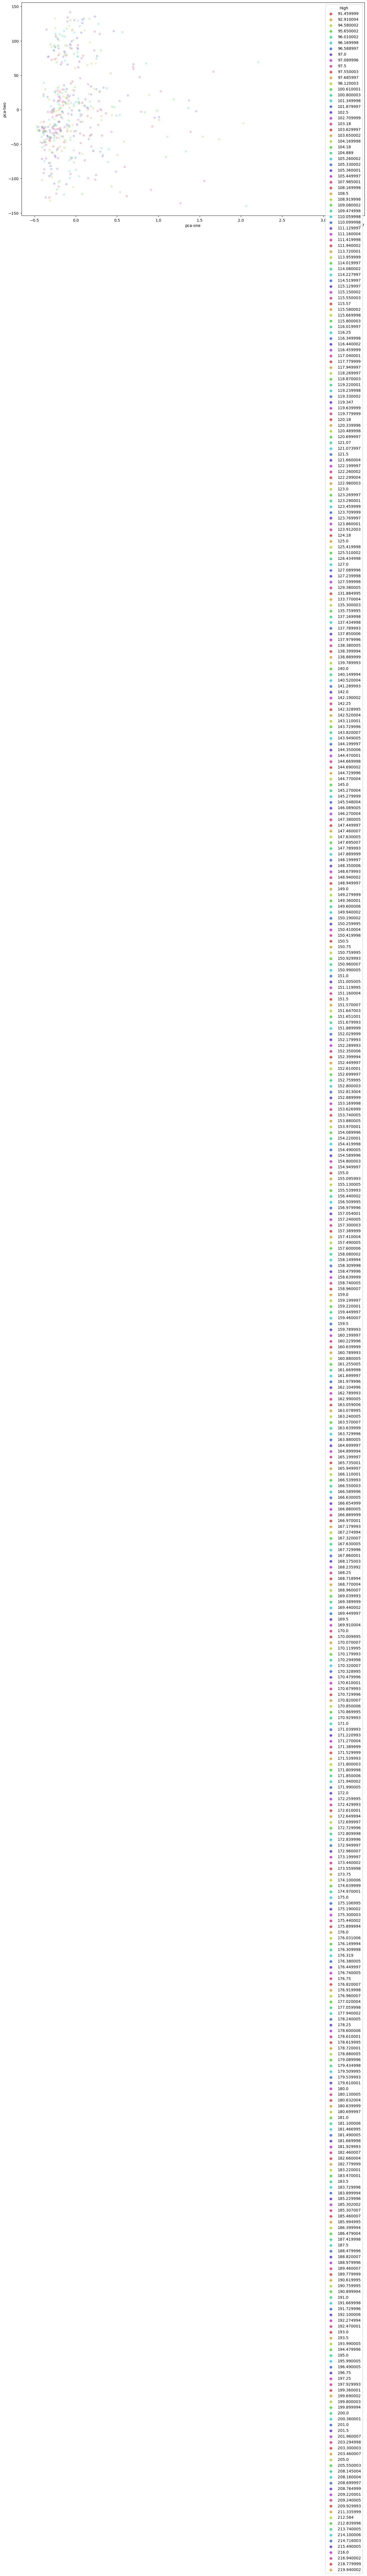

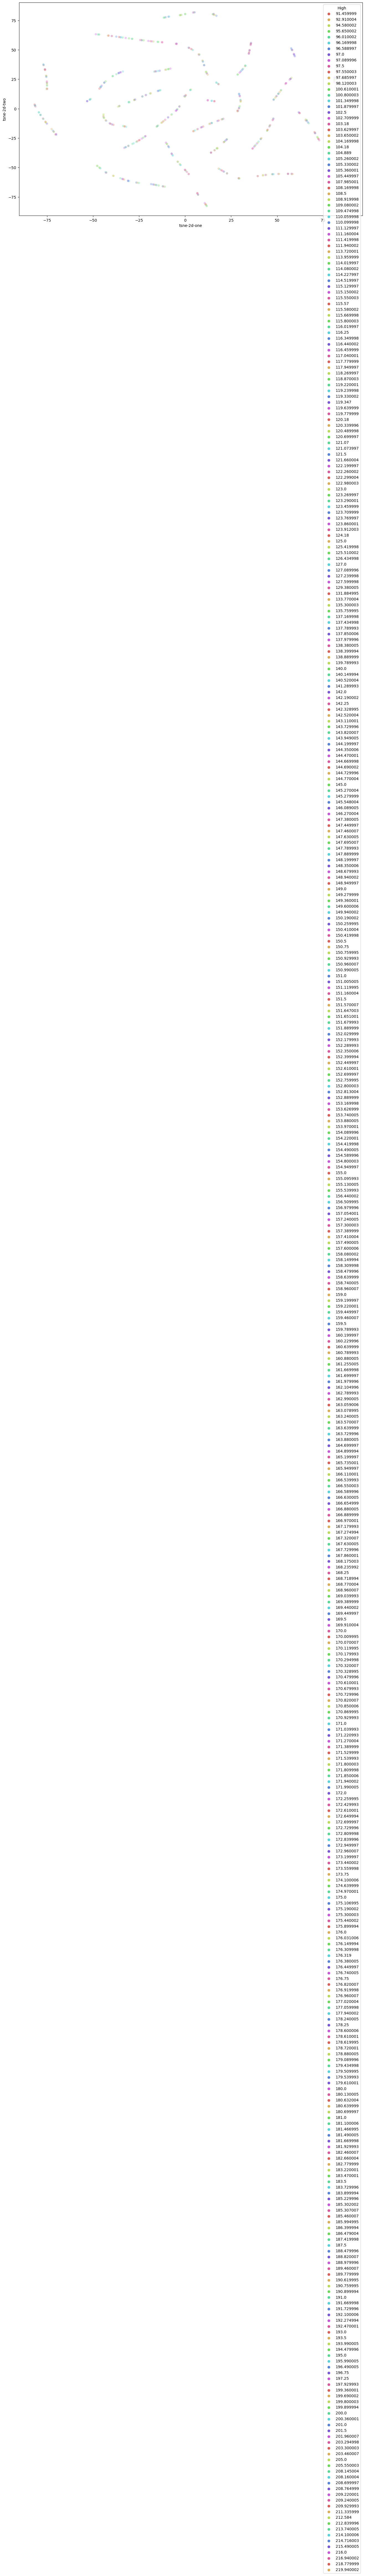

In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


df = pd.read_csv('ABNB.csv')
df = df.drop("Date", axis = 1)

rndperm = np.random.permutation(df.shape[0])
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()

arr = df.to_numpy()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.values)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="High",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)


tsne_results = TSNE(n_components=2, verbose=1 ,learning_rate='auto', init='random', perplexity=3).fit_transform(arr)
tsne_results.shape

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="High",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)
